ÌèâÍ∞ÄÎ¨∏Ìï≠	ÏÉÅÏÑ∏Í∏∞Ï§Ä
1. Text recognitionÏùÑ ÏúÑÌï¥ ÌäπÌôîÎêú Îç∞Ïù¥ÌÑ∞ÏÖã Íµ¨ÏÑ±Ïù¥ Ï≤¥Í≥ÑÏ†ÅÏúºÎ°ú ÏßÑÌñâÎêòÏóàÎã§.	


    ÌÖçÏä§Ìä∏ Ïù¥ÎØ∏ÏßÄ Î¶¨ÏÇ¨Ïù¥Ïßï, ctc loss Ï∏°Ï†ïÏùÑ ÏúÑÌïú ÎùºÎ≤® Ïù∏ÏΩîÎî©, Î∞∞ÏπòÏ≤òÎ¶¨ Îì±Ïù¥ Ï†ÅÏ†àÌûà ÏàòÌñâÎêòÏóàÎã§.


2. CRNN Í∏∞Î∞òÏùò recognition Î™®Îç∏Ïùò ÌïôÏäµÏù¥ Ï†ïÏÉÅÏ†ÅÏúºÎ°ú ÏßÑÌñâÎêòÏóàÎã§.	


    ÌïôÏäµÍ≤∞Í≥º lossÍ∞Ä ÏïàÏ†ïÏ†ÅÏúºÎ°ú Í∞êÏÜåÌïòÍ≥† ÎåÄÎ∂ÄÎ∂ÑÏùò Î¨∏ÏûêÏù∏Ïãù Ï∂îÎ°† Í≤∞Í≥ºÍ∞Ä Ï†ïÌôïÌïòÎã§.


3. keras-ocr detectorÏôÄ CRNN recognizerÎ•º ÏóÆÏñ¥ ÏõêÎ≥∏ Ïù¥ÎØ∏ÏßÄ ÏûÖÎ†•ÏúºÎ°úÎ∂ÄÌÑ∞ textÍ∞Ä Ï∂úÎ†•ÎêòÎäî OCRÏù¥ End-to-EndÎ°ú Íµ¨ÏÑ±ÎêòÏóàÎã§.	


    ÏÉòÌîå Ïù¥ÎØ∏ÏßÄÎ•º ÏõêÎ≥∏ÏúºÎ°ú Î∞õÏïÑ OCR ÏàòÌñâ Í≤∞Í≥ºÎ•º Î¶¨ÌÑ¥ÌïòÎäî 1Í∞úÏùò Ìï®ÏàòÍ∞Ä ÎßåÎì§Ïñ¥Ï°åÎã§.



keras OCRÏùò Detector classÎ•º Ïù¥Ïö©Ìï¥ÏÑú Ïù¥ÎØ∏ÏßÄ ÎÇ¥Ïùò Î¨∏Ïûê ÏúÑÏπòÎ•º Ï∞æÏïÑÎÇ¥Îäî Ìï®ÏàòÎ•º ÎßåÎì§Ïñ¥Î≥¥ÎèÑÎ°ù ÌïòÍ≤†ÏäµÎãàÎã§. 

Ïù¥Î•º ÏúÑÌï¥ÏÑú keras-ocrÏùÑ ÏÑ§ÏπòÌï¥Ï£ºÍ≥† DetectorÎ•º ÎßåÎì§Ïñ¥Ï£ºÏÑ∏Ïöî.

In [1]:
import re
import six
import math
import lmdb
import os
import numpy as np
import tensorflow as tf

from PIL import Image

from tensorflow.keras import layers
from tensorflow.keras.models import Model
from tensorflow.keras.utils import Sequence
from tensorflow.keras import backend as K
from tensorflow.keras.models import load_model

BATCH_SIZE = 128
HOME_DIR = os.getenv('HOME')+'/aiffel/ocr'

TRAIN_DATA_PATH = HOME_DIR+'/data/MJ/MJ_train/'
VALID_DATA_PATH = HOME_DIR+'/data/MJ/MJ_valid'
TEST_DATA_PATH = HOME_DIR+'/data/MJ/MJ_test'

print(TRAIN_DATA_PATH)

/aiffel/aiffel/ocr/data/MJ/MJ_train/


In [34]:
import numpy as np
import keras_ocr
from PIL import Image, ImageDraw

# keras-ocrÏùò Detector Ïù∏Ïä§ÌÑ¥Ïä§ ÏÉùÏÑ± (ÏµúÏ¥à Ïã§Ìñâ Ïãú Î™®Îç∏ Îã§Ïö¥Î°úÎìú ÏßÑÌñâ)
detector = keras_ocr.detection.Detector()

def detect_text(img_input):
    """
    Ïù¥ÎØ∏ÏßÄ ÎÇ¥ÏóêÏÑú ÌÖçÏä§Ìä∏ ÏòÅÏó≠ÏùÑ Í≤ÄÏ∂úÌïòÎäî Ìï®Ïàò.
    img_inputÏù¥ ÌååÏùº Í≤ΩÎ°ú(str)ÎùºÎ©¥ Î°úÎìúÌïòÍ≥†, PIL Ïù¥ÎØ∏ÏßÄ Í∞ùÏ≤¥ÎùºÎ©¥ Í∑∏ÎåÄÎ°ú ÏÇ¨Ïö©.
    """
    # 1. ÌååÏùº Í≤ΩÎ°úÏù∏ÏßÄ ÌôïÏù∏ÌïòÍ≥†, ÏïÑÎãàÎùºÎ©¥ PIL Ïù¥ÎØ∏ÏßÄÎ°ú Ï≤òÎ¶¨
    if isinstance(img_input, str):  # ÌååÏùº Í≤ΩÎ°ú(str)Ïù∏ Í≤ΩÏö∞
        img_pil = Image.open(img_input).convert("RGB")
    elif isinstance(img_input, Image.Image):  # PIL Ïù¥ÎØ∏ÏßÄÏù∏ Í≤ΩÏö∞
        img_pil = img_input
    else:
        raise ValueError("img_input must be a file path (str) or a PIL.Image object")

    # 2. numpy arrayÎ°ú Î≥ÄÌôò (H, W, C) Î∞è Î∞∞Ïπò Ï∞®Ïõê ÌôïÏû• (Î¶¨Ïä§Ìä∏Î°ú Í∞êÏã∏Ï§å)
    img = np.array(img_pil)
    img_batch = [img]  # Î∞∞Ïπò Ï≤òÎ¶¨Î•º ÏúÑÌïú Î¶¨Ïä§Ìä∏ ÌòïÌÉú

    # 3. keras-ocr ÏûÖÎ†• Ï∞®ÏõêÏóê ÎßûÍ≤å inference ÏßÑÌñâ
    ocr_results = detector.detect(img_batch)
    ocr_result = ocr_results[0]  # Î∞∞ÏπòÏùò Ï≤´ Î≤àÏß∏ Í≤∞Í≥º ÏÇ¨Ïö©

    # 4. Í≤∞Í≥º ÏãúÍ∞ÅÌôîÎ•º ÏúÑÌï¥ Ïù¥ÎØ∏ÏßÄ Î≥µÏÇ¨ Î∞è drawing Í∞ùÏ≤¥ ÏÉùÏÑ±
    result_img = img_pil.copy()
    img_draw = ImageDraw.Draw(result_img)
    
    cropped_imgs = []
    for text_result in ocr_result:
        polygon = [tuple(point) for point in text_result]
        img_draw.polygon(polygon, outline='red')
        
        # ÌÖçÏä§Ìä∏ ÏòÅÏó≠ Ï¢åÌëú Ï∂îÏ∂ú 5 -> 10ÏúºÎ°ú ÎäòÎ¶¨Í∏∞
        
        x_min = int(text_result[:, 0].min() - 10)
        x_max = int(text_result[:, 0].max() + 10)
        y_min = int(text_result[:, 1].min() - 10)
        y_max = int(text_result[:, 1].max() + 10)
        word_box = (x_min, y_min, x_max, y_max)
        
        # ÌÖçÏä§Ìä∏ ÏòÅÏó≠ ÏûòÎùºÎÇ¥Í∏∞
        cropped_imgs.append(img_pil.crop(word_box))
    
    return result_img, cropped_imgs



Looking for /aiffel/.keras-ocr/craft_mlt_25k.h5


original image width:72, height:31
target_img_size:(74, 32)
display img shape:(74, 32, 3)
label:Lube


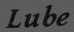

original image width:82, height:31
target_img_size:(84, 32)
display img shape:(84, 32, 3)
label:Spencerian


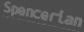

original image width:115, height:31
target_img_size:(100, 32)
display img shape:(100, 32, 3)
label:accommodatingly


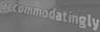

original image width:140, height:31
target_img_size:(100, 32)
display img shape:(100, 32, 3)
label:CARPENTER


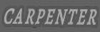

In [3]:
from IPython.display import display

# envÏóê Îç∞Ïù¥ÌÑ∞Î•º Î∂àÎü¨Ïò¨Í≤åÏöî
# lmdbÏóêÏÑú Îç∞Ïù¥ÌÑ∞Î•º Î∂àÎü¨Ïò¨ Îïå envÎùºÎäî Î≥ÄÏàòÎ™ÖÏùÑ ÏÇ¨Ïö©ÌïòÎäîÍ≤å ÏùºÎ∞òÏ†ÅÏù¥ÏóêÏöî
env = lmdb.open(TRAIN_DATA_PATH, 
                max_readers=32, 
                readonly=True, 
                lock=False, 
                readahead=False, 
                meminit=False)

# Î∂àÎü¨Ïò® Îç∞Ïù¥ÌÑ∞Î•º txn(transaction)Ïù¥ÎùºÎäî Î≥ÄÏàòÎ•º ÌÜµÌï¥ ÏóΩÎãàÎã§
# Ïù¥Ï†ú txnÎ≥ÄÏàòÎ•º ÌÜµÌï¥ ÏßÅÏ†ë Îç∞Ïù¥ÌÑ∞Ïóê Ï†ëÍ∑º Ìï† Ïàò ÏûàÏñ¥Ïöî
with env.begin(write=False) as txn:
    for index in range(1, 5):
        # indexÎ•º Ïù¥Ïö©Ìï¥ÏÑú ÎùºÎ≤® ÌÇ§ÏôÄ Ïù¥ÎØ∏ÏßÄ ÌÇ§Î•º ÎßåÎì§Î©¥
        # txnÏóêÏÑú ÎùºÎ≤®Í≥º Ïù¥ÎØ∏ÏßÄÎ•º ÏùΩÏñ¥Ïò¨ Ïàò ÏûàÏñ¥Ïöî
        label_key = 'label-%09d'.encode() % index
        label = txn.get(label_key).decode('utf-8')
        img_key = 'image-%09d'.encode() % index
        imgbuf = txn.get(img_key)
        buf = six.BytesIO()
        buf.write(imgbuf)
        buf.seek(0)

        # Ïù¥ÎØ∏ÏßÄÎäî Î≤ÑÌçºÎ•º ÌÜµÌï¥ ÏùΩÏñ¥Ïò§Í∏∞ ÎïåÎ¨∏Ïóê 
        # Î≤ÑÌçºÏóêÏÑú Ïù¥ÎØ∏ÏßÄÎ°ú Î≥ÄÌôòÌïòÎäî Í≥ºÏ†ïÏù¥ Îã§Ïãú ÌïÑÏöîÌï¥Ïöî
        try:
            img = Image.open(buf).convert('RGB')

        except IOError:
            img = Image.new('RGB', (100, 32))
            label = '-'

        # ÏõêÎ≥∏ Ïù¥ÎØ∏ÏßÄ ÌÅ¨Í∏∞Î•º Ï∂úÎ†•Ìï¥ Î¥ÖÎãàÎã§
        width, height = img.size
        print('original image width:{}, height:{}'.format(width, height))
        
        # Ïù¥ÎØ∏ÏßÄ ÎπÑÏú®ÏùÑ Ïú†ÏßÄÌïòÎ©¥ÏÑú ÎÜíÏù¥Î•º 32Î°ú Î∞îÍøÄÍ±∞ÏóêÏöî
        # ÌïòÏßÄÎßå ÎÑàÎπÑÎ•º 100Î≥¥Îã§Îäî ÏûëÍ≤åÌïòÍ≥† Ïã∂Ïñ¥Ïöî
        target_width = min(int(width*32/height), 100)
        target_img_size = (target_width,32)        
        print('target_img_size:{}'.format(target_img_size))        
        img = np.array(img.resize(target_img_size)).transpose(1,0,2)

        # Ïù¥Ï†ú ÎÜíÏù¥Í∞Ä 32Î°ú ÏùºÏ†ïÌïú Ïù¥ÎØ∏ÏßÄÏôÄ ÎùºÎ≤®ÏùÑ Ìï®Íªò Ï∂úÎ†•Ìï† Ïàò ÏûàÏñ¥Ïöî       
        print('display img shape:{}'.format(img.shape))
        print('label:{}'.format(label))
        display(Image.fromarray(img.transpose(1,0,2).astype(np.uint8)))

In [4]:
class MJDatasetSequence(Sequence):
    # Í∞ùÏ≤¥Î•º Ï¥àÍ∏∞Ìôî Ìï† Îïå lmdbÎ•º Ïó¥Ïñ¥ envÏóê Ï§ÄÎπÑÌï¥Îë°ÎãàÎã§
    # Îòê, lmdbÏóê ÏûàÎäî Îç∞Ïù¥ÌÑ∞ ÏàòÎ•º ÎØ∏Î¶¨ ÌååÏïÖÌï¥Îë°ÎãàÎã§
    def __init__(self, 
                 dataset_path,
                 label_converter,
                 batch_size=1,
                 img_size=(100,32),
                 max_text_len=22,
                 is_train=False,
                 character='') :
        
        self.label_converter = label_converter
        self.batch_size = batch_size
        self.img_size = img_size
        self.max_text_len = max_text_len
        self.character = character
        self.is_train = is_train
        self.divide_length = 100

        self.env = lmdb.open(dataset_path, max_readers=32, readonly=True, lock=False, readahead=False, meminit=False)
        with self.env.begin(write=False) as txn:
            self.num_samples = int(txn.get('num-samples'.encode()))
            self.index_list = [index + 1 for index in range(self.num_samples)]
        

    def __len__(self):
        return math.ceil(self.num_samples/self.batch_size/self.divide_length)
    
    # indexÏóê Ìï¥ÎãπÌïòÎäî imageÏôÄ labelÏùÑ ÏùΩÏñ¥ÏòµÎãàÎã§
    # ÏúÑÏóêÏÑú ÏÇ¨Ïö©Ìïú ÏΩîÎìúÏôÄ Îß§Ïö∞ Ïú†ÏÇ¨Ìï©ÎãàÎã§
    # labelÏùÑ Ï°∞Í∏à Îçî Îã§Îì¨Îäî Í≤ÉÏù¥ ÏïΩÍ∞Ñ Îã§Î¶ÖÎãàÎã§
    def _get_img_label(self, index):
        with self.env.begin(write=False) as txn:
            label_key = 'label-%09d'.encode() % index
            label = txn.get(label_key).decode('utf-8')
            img_key = 'image-%09d'.encode() % index
            imgbuf = txn.get(img_key)

            buf = six.BytesIO()
            buf.write(imgbuf)
            buf.seek(0)
            try:
                img = Image.open(buf).convert('RGB')

            except IOError:
                img = Image.new('RGB', self.img_size)
                label = '-'
            width, height = img.size
            
            target_width = min(int(width*self.img_size[1]/height), self.img_size[0])
            target_img_size = (target_width, self.img_size[1])
            img = np.array(img.resize(target_img_size)).transpose(1,0,2)
            # labelÏùÑ ÏïΩÍ∞Ñ Îçî Îã§Îì¨ÏäµÎãàÎã§
            label = label.upper()
            out_of_char = f'[^{self.character}]'
            label = re.sub(out_of_char, '', label)
            label = label[:self.max_text_len]

        return (img, label)
    
    # __getitem__ÏùÄ ÏïΩÏÜçÎêòÏñ¥ÏûàÎäî Î©îÏÑúÎìúÏûÖÎãàÎã§
    # Ïù¥ Î∂ÄÎ∂ÑÏùÑ ÏûëÏÑ±ÌïòÎ©¥ sliceÌï† Ïàò ÏûàÏäµÎãàÎã§
    # ÏûêÏÑ∏Ìûà ÏïåÍ≥† Ïã∂Îã§Î©¥ ÏïÑÎûò Î¨∏ÏÑúÎ•º Ï∞∏Í≥†ÌïòÏÑ∏Ïöî
    # https://docs.python.org/3/reference/datamodel.html#object.__getitem__
    # 
    # 1. idxÏóê Ìï¥ÎãπÌïòÎäî index_listÎßåÌÅº Îç∞Ïù¥ÌÑ∞Î•º Î∂àÎü¨
    # 2. imageÏôÄ labelÏùÑ Î∂àÎü¨Ïò§Í≥† 
    # 3. ÏÇ¨Ïö©ÌïòÍ∏∞ Ï¢ãÏùÄ inputsÍ≥º outputsÌòïÌÉúÎ°ú Î∞òÌôòÌï©ÎãàÎã§
    def __getitem__(self, idx):
        # 1.
        batch_indicies = self.index_list[
            idx*self.batch_size:
            (idx+1)*self.batch_size
        ]
        input_images = np.zeros([self.batch_size, *self.img_size, 3])
        labels = np.zeros([self.batch_size, self.max_text_len], dtype='int64')

        input_length = np.ones([self.batch_size], dtype='int64') * self.max_text_len
        label_length = np.ones([self.batch_size], dtype='int64')

        # 2.
        for i, index in enumerate(batch_indicies):
            img, label = self._get_img_label(index)
            encoded_label = self.label_converter.encode(label)
            # Ïù∏ÏΩîÎî© Í≥ºÏ†ïÏóêÏÑú '-'Ïù¥ Ï∂îÍ∞ÄÎêòÎ©¥ max_text_lenÎ≥¥Îã§ Í∏∏Ïñ¥Ïßà Ïàò ÏûàÏñ¥Ïöî
            if len(encoded_label) > self.max_text_len:
                continue
            width = img.shape[0]
            input_images[i,:width,:,:] = img
            labels[i,0:len(encoded_label)] = encoded_label
            label_length[i] = len(encoded_label)
        
        # 3.
        inputs = {
            'input_image': input_images,
            'label': labels,
            'input_length': input_length,
            'label_length': label_length,
        }
        outputs = {'ctc': np.zeros([self.batch_size, 1])}

        return inputs, outputs

In [5]:
class LabelConverter(object):

     def __init__(self, character):
         self.character = "-" + character
         self.label_map = dict()
         for i, char in enumerate(self.character):
             self.label_map[char] = i

     def encode(self, text):
         encoded_label = []
         for i, char in enumerate(text):
             if i > 0 and char == text[i - 1]:
                 encoded_label.append(0)    # Í∞ôÏùÄ Î¨∏Ïûê ÏÇ¨Ïù¥Ïóê Í≥µÎ∞± Î¨∏Ïûê labelÏùÑ ÏÇΩÏûÖ
             encoded_label.append(self.label_map[char])
         return np.array(encoded_label)

         return np.array(encoded_label)

     def decode(self, encoded_label):
         target_characters = list(self.character)
         decoded_label = ""
         for encode in encoded_label:
             decoded_label += self.character[encode]
         return decoded_label

In [7]:
NUMBERS = "0123456789"
ENG_CHAR_UPPER = "ABCDEFGHIJKLMNOPQRSTUVWXYZ"
TARGET_CHARACTERS = ENG_CHAR_UPPER + NUMBERS

In [8]:
label_converter = LabelConverter(TARGET_CHARACTERS)

In [9]:
def ctc_lambda_func(args): # CTC lossÎ•º Í≥ÑÏÇ∞ÌïòÍ∏∞ ÏúÑÌïú Lambda Ìï®Ïàò
    labels, y_pred, label_length, input_length = args
    y_pred = y_pred[:, 2:, :]
    return K.ctc_batch_cost(labels, y_pred, input_length, label_length)

In [10]:
def build_crnn_model(input_shape=(100,32,3), characters=TARGET_CHARACTERS):
    num_chars = len(characters)+2
    image_input = layers.Input(shape=input_shape, dtype='float32', name='input_image')
    
    # Build CRNN model
    conv = layers.Conv2D(64, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal')(image_input)
    conv = layers.MaxPooling2D(pool_size=(2, 2))(conv)
    conv = layers.Conv2D(128, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal')(conv)
    conv = layers.MaxPooling2D(pool_size=(2, 2))(conv)
    conv = layers.Conv2D(256, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal')(conv)
    conv = layers.Conv2D(256, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal')(conv)
    conv = layers.MaxPooling2D(pool_size=(1, 2))(conv)
    conv = layers.Conv2D(512, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal')(conv)
    conv = layers.BatchNormalization()(conv)
    conv = layers.Conv2D(512, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal')(conv)
    conv = layers.BatchNormalization()(conv)
    conv = layers.MaxPooling2D(pool_size=(1, 2))(conv)     
    feature = layers.Conv2D(512, (2, 2), activation='relu', kernel_initializer='he_normal')(conv)
    sequnce = layers.Reshape(target_shape=(24, 512))(feature)
    sequnce = layers.Dense(64, activation='relu')(sequnce)
    sequnce = layers.Bidirectional(layers.LSTM(256, return_sequences=True))(sequnce)
    sequnce = layers.Bidirectional(layers.LSTM(256, return_sequences=True))(sequnce)
    y_pred = layers.Dense(num_chars, activation='softmax', name='output')(sequnce)

    labels = layers.Input(shape=[22], dtype='int64', name='label')
    input_length = layers.Input(shape=[1], dtype='int64', name='input_length')
    label_length = layers.Input(shape=[1], dtype='int64', name='label_length')
    loss_out = layers.Lambda(ctc_lambda_func, output_shape=(1,), name="ctc")(
        [labels, y_pred, label_length, input_length]
    )
    model_input = [image_input, labels, input_length, label_length]
    model = Model(
        inputs=model_input,
        outputs=loss_out
    )
    return model

In [11]:
# Îç∞Ïù¥ÌÑ∞ÏÖãÍ≥º Î™®Îç∏ÏùÑ Ï§ÄÎπÑÌï©ÎãàÎã§
train_set = MJDatasetSequence(TRAIN_DATA_PATH, label_converter, batch_size=BATCH_SIZE, character=TARGET_CHARACTERS, is_train=True)
val_set = MJDatasetSequence(VALID_DATA_PATH, label_converter, batch_size=BATCH_SIZE, character=TARGET_CHARACTERS)
model = build_crnn_model()

# Î™®Îç∏ÏùÑ Ïª¥ÌååÏùº Ìï©ÎãàÎã§
optimizer = tf.keras.optimizers.Adadelta(lr=0.1, clipnorm=5)
model.compile(loss={'ctc': lambda y_true, y_pred: y_pred}, optimizer=optimizer)

/opt/conda/lib/python3.9/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


# ÌõàÎ†®Ïù¥ Îπ®Î¶¨ ÎÅùÎÇ† Ïàò ÏûàÎèÑÎ°ù ModelCheckPointÏôÄ EarlyStoppingÏùÑ ÏÇ¨Ïö©Ìï©ÎãàÎã§
# ModelCheckPointÏùò Í≤ΩÏö∞ 'val_loss'Î•º Î™®ÎãàÌÑ∞ÎßÅÌïòÍ≥† weightÎßå Ï†ÄÏû•ÌïòÎäî ÏòµÏÖòÏúºÎ°ú ÏßÄÏ†ïÌï¥Ï£ºÏÑ∏Ïöî.
# EarlyStoppingÎèÑ 'val_loss'Î•º Î™®ÎãàÌÑ∞ÎßÅÌï¥Ï£ºÏÑ∏Ïöî.
# (EarlyStoppingÏùÑ ÏÇ¨Ïö©ÌïòÏßÄ ÏïäÎäî Í≤ΩÏö∞, model.fit()Ïùò epoch ÏòµÏÖòÏùÑ 20 Ï†ïÎèÑÎ°ú ÏÑ§Ï†ïÌï¥Ï£ºÏÑ∏Ïöî.

checkpoint_path = HOME_DIR + '/model_checkpoint.hdf5'
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping


# ModelCheckpoint: val_loss Î™®ÎãàÌÑ∞ÎßÅ, weightÎßå Ï†ÄÏû•, Í∞ÄÏû• Ï¢ãÏùÄ Î™®Îç∏Îßå Ï†ÄÏû•ÌïòÎèÑÎ°ù ÏÑ§Ï†ï
ckp = ModelCheckpoint(filepath=checkpoint_path, 
                      monitor='val_loss', 
                      save_weights_only=True, 
                      save_best_only=True, 
                      verbose=1)

# EarlyStopping: val_loss Î™®ÎãàÌÑ∞ÎßÅ, patience(Í∞úÏÑ†Ïù¥ ÏóÜÏùÑ Îïå Í∏∞Îã§Î¶¥ epoch Ïàò)Î•º 5Î°ú ÏÑ§Ï†ï
earlystop = EarlyStopping(monitor='val_loss', 
                          patience=5, 
                          verbose=1)

# Î™®Îç∏ ÌïôÏäµ Ïãú, callbacks Ïù∏ÏûêÏóê ÏúÑÏóêÏÑú Ï†ïÏùòÌïú ÏΩúÎ∞±Îì§ÏùÑ Ï†ÑÎã¨Ìï©ÎãàÎã§.
model.fit(train_set,
          steps_per_epoch=len(train_set),
          epochs=20,
          validation_data=val_set,
          validation_steps=len(val_set),
          callbacks=[ckp, earlystop])


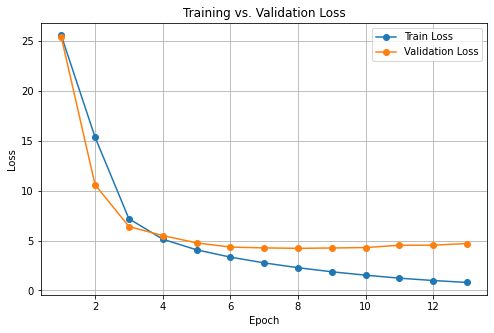

In [12]:
import matplotlib.pyplot as plt

# ÏàòÎèôÏúºÎ°ú ÏûÖÎ†•Ìïú ÏóêÌè¨ÌÅ¨Î≥Ñ loss Í∞í (Epoch 1 ~ Epoch 13)
epochs = list(range(1, 14))
train_loss = [25.5302, 15.3391, 7.1827, 5.1342, 4.0692, 3.3379, 2.7610, 2.2785, 1.8694, 1.5295, 1.2314, 0.9955, 0.8031]
val_loss = [25.3794, 10.5830, 6.4008, 5.4947, 4.7635, 4.3464, 4.2596, 4.2169, 4.2510, 4.2974, 4.5248, 4.5332, 4.6973]

plt.figure(figsize=(8, 5))
plt.plot(epochs, train_loss, marker='o', label='Train Loss')
plt.plot(epochs, val_loss, marker='o', label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training vs. Validation Loss')
plt.legend()
plt.grid(True)
plt.show()


validation Í∞íÏù¥ Í∞ÄÏû• ÎÜíÏùÄ epochÎ°ú ÏÑ§Ï†ï earlystoppingÏúºÎ°ú 13ÏóêÏÑú Î©àÏ∑ÑÏùå

In [13]:
# Îã§ÏùåÏùÄ ÌïôÏäµÎêú Î™®Îç∏Ïùò Í∞ÄÏ§ëÏπòÍ∞Ä Ï†ÄÏû•Îêú Í≤ΩÎ°úÏûÖÎãàÎã§
checkpoint_path = HOME_DIR + '/data/model_checkpoint.hdf5'

# Îç∞Ïù¥ÌÑ∞ÏÖãÍ≥º Î™®Îç∏ÏùÑ Î∂àÎü¨ÏòµÎãàÎã§
test_set = MJDatasetSequence(TEST_DATA_PATH, label_converter, batch_size=BATCH_SIZE, character=TARGET_CHARACTERS)
model = build_crnn_model()
model.load_weights(checkpoint_path)

# crnn Î™®Îç∏ÏùÄ ÏûÖÎ†•Ïù¥ Î≥µÏû°Ìïú Íµ¨Ï°∞Ïù¥ÎØÄÎ°ú Í∑∏ÎåÄÎ°ú ÏÇ¨Ïö©Ìï† ÏàòÍ∞Ä ÏóÜÏäµÎãàÎã§
# Í∑∏ÎûòÏÑú crnn Î™®Îç∏Ïùò ÏûÖÎ†•Ï§ë 'input_image' Î∂ÄÎ∂ÑÎßå ÏÇ¨Ïö©Ìïú Î™®Îç∏ÏùÑ ÏÉàÎ°ú ÎßåÎì§Í≤ÅÎãàÎã§
# inference Ï†ÑÏö© Î™®Îç∏Ïù¥ÏóêÏöî 
input_data = model.get_layer('input_image').output
y_pred = model.get_layer('output').output
model_pred = Model(inputs=input_data, outputs=y_pred)

Result: 	 SLINKING


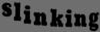

Result: 	 ALEPPO


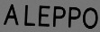

Result: 	 FWANDA


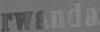

Result: 	 NATHANS


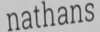

Result: 	 HALLE


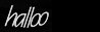

Result: 	 HURLS


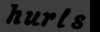

Result: 	 DOWNSIZE


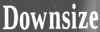

Result: 	 ROBOTIC


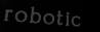

Result: 	 SLOPPY


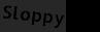

Result: 	 SHERMITE


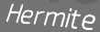

In [14]:
from IPython.display import display

# Î™®Îç∏Ïù¥ inferenceÌïú Í≤∞Í≥ºÎ•º Í∏ÄÏûêÎ°ú Î∞îÍøîÏ£ºÎäî Ïó≠Ìï†ÏùÑ Ìï©ÎãàÎã§
# ÏΩîÎìú ÌïòÎÇòÌïòÎÇòÎ•º Ïù¥Ìï¥ÌïòÍ∏∞Îäî Ï°∞Í∏à Ïñ¥Î†§Ïö∏ Ïàò ÏûàÏäµÎãàÎã§
def decode_predict_ctc(y_pred, chars):
    """
    CTC ÎîîÏΩîÎî©ÏùÑ ÏàòÌñâÌïòÎäî Ìï®Ïàò
    - y_pred: (batch, time_steps, num_classes) ÌòïÌÉúÏùò Î™®Îç∏ Ï∂úÎ†•
    - chars : Î¨∏Ïûê ÏßëÌï©, blank('-') Ìè¨Ìï®
    """
    decoded, _ = K.ctc_decode(
        y_pred, 
        input_length=np.ones(y_pred.shape[0]) * y_pred.shape[1],
        greedy=True
    )
    
    decoded_indices = K.get_value(decoded[0])  # (batch, decoded_length)

    results = []
    for seq in decoded_indices:
        text = ""
        prev_idx = -1  # Ïù¥Ï†Ñ Ïù∏Îç±Ïä§Î•º Ï∂îÏ†ÅÌïòÏó¨ Ï§ëÎ≥µ Ï†úÍ±∞
        for idx in seq:
            if idx != prev_idx and idx > 0:  # 0(blank) Ï†úÏô∏, Ï§ëÎ≥µ Î¨∏Ïûê Ï†úÍ±∞
                text += chars[idx]
            prev_idx = idx  # Ïù¥Ï†Ñ Ïù∏Îç±Ïä§ ÏóÖÎç∞Ïù¥Ìä∏
        results.append(text)

    return results


# Î™®Îç∏Í≥º Îç∞Ïù¥ÌÑ∞ÏÖãÏù¥ Ï£ºÏñ¥ÏßÄÎ©¥ inferenceÎ•º ÏàòÌñâÌï©ÎãàÎã§
# indexÍ∞ú ÎßåÌÅºÏùò Îç∞Ïù¥ÌÑ∞Î•º ÏùΩÏñ¥ Î™®Îç∏Î°ú inferenceÎ•º ÏàòÌñâÌïòÍ≥†
# Í≤∞Í≥ºÎ•º ÎîîÏΩîÎî©Ìï¥ Ï∂úÎ†•Ìï¥Ï§çÎãàÎã§
def check_inference(model, dataset, index=5):
    for i in range(index):
        inputs, outputs = dataset[i]
        img = dataset[i][0]['input_image'][0:1, :, :, :]
        output = model.predict(img)
        
        # Î≥ÄÍ≤ΩÎêú CTC ÎîîÏΩîÎî© Ï†ÅÏö©
        result = decode_predict_ctc(output, chars="-" + TARGET_CHARACTERS)[0]
        
        print("Result: \t", result)
        display(Image.fromarray(img[0].transpose(1, 0, 2).astype(np.uint8)))


check_inference(model_pred, test_set, index=10)

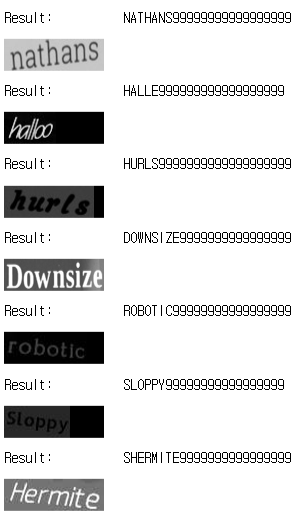

Ï∂úÎ†• Í≤∞Í≥ºÎ¨ºÏóêÏÑú 99999Î°ú ÎÇòÌÉÄÎÇòÎäî Ïò§Î•ò(?) Î∞úÏÉù.

CTC ÎîîÏΩîÎî© Î∂ÄÎ∂ÑÏóêÏÑú Blank Ï™ΩÏù¥ ÏûòÎ™ª Îêú Í≤É Í∞ôÏäµÎãàÎã§.

Greedy ÎîîÏΩîÎî© ÌôúÏÑ±ÌôîÌïòÍ≥†  CTC blank (Ïù∏Îç±Ïä§ 0) Î¨¥ÏãúÌïòÎäî Î∞©Ìñ•ÏúºÎ°ú ÏùºÎã® ÏàòÏ†ïÌïòÏòÄÏäµÎãàÎã§.

greedy Î•º ÌñàÏùÑ Îïå Î∞úÏÉùÌïòÎäî Î¨∏Ï†úÏ†ê ÏÉùÍ∞Å, blankÎ•º Î¨¥ÏãúÌïòÎ©¥ Ïñ¥Îñ§Í≤å Î¨∏Ï†úÍ∞Ä ÏÉùÍ∏∞Îäî ÏßÄ ÎÇòÏ§ëÏóê Î¥êÏïºÌï®.



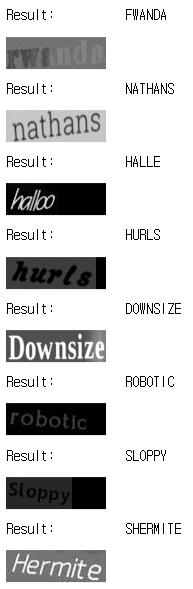

In [19]:
import numpy as np
from PIL import Image

def recognize_img(pil_img, model, chars, input_img_size=(100, 32)):
    """
    OCR Î™®Îç∏ÏùÑ Ïù¥Ïö©ÌïòÏó¨ Îã®Ïñ¥ Ïù¥ÎØ∏ÏßÄÎ•º ÏòàÏ∏°ÌïòÎäî Ìï®Ïàò (Í∞ÄÎ°ú/ÏÑ∏Î°ú Î≥ÄÌôò Î¨∏Ï†ú ÏàòÏ†ï)
    """
    # 1. Ïù¥ÎØ∏ÏßÄ ÌÅ¨Í∏∞Î•º OCR Î™®Îç∏Ïù¥ Í∏∞ÎåÄÌïòÎäî (100, 32)Î°ú Î≥ÄÌôò
    resized_img = pil_img.resize(input_img_size, Image.ANTIALIAS)  # (100, 32)

    # 2. numpy Î∞∞Ïó¥ Î≥ÄÌôò Î∞è Ï†ïÍ∑úÌôî (0~1)
    img_array = np.array(resized_img).astype(np.float32) / 255.0

    # 3. **ÌùëÎ∞± Ïù¥ÎØ∏ÏßÄ ‚Üí RGB Î≥ÄÌôò**
    if len(img_array.shape) == 2:  # ÌùëÎ∞± Ïù¥ÎØ∏ÏßÄÎùºÎ©¥
        img_array = np.expand_dims(img_array, axis=-1)  # (100, 32, 1)
        img_array = np.repeat(img_array, 3, axis=-1)  # (100, 32, 3)

    # 4. **Ï±ÑÎÑê ÏàúÏÑú ÌôïÏù∏ Î∞è Î∞∞Ïπò Ï∞®Ïõê Ï∂îÍ∞Ä**
    img_array = np.expand_dims(img_array, axis=0)  # (1, H, W, C)

    if img_array.shape[1] != 100:  # ÎÜíÏù¥Í∞Ä 100Ïù¥ ÏïÑÎãàÎùºÎ©¥ Î≥ÄÌôò ÌïÑÏöî
        img_array = np.transpose(img_array, (0, 2, 1, 3))  # (1, 32, 100, 3) ‚Üí (1, 100, 32, 3)

    print(f"‚úÖ Model Input Shape (Fixed): {img_array.shape}")

    # 5. **OCR Î™®Îç∏ ÏòàÏ∏° ÏàòÌñâ**
    y_pred = model.predict(img_array)

    # 6. **CTC ÎîîÏΩîÎî© ÏàòÌñâ**
    decoded_text = decode_predict_ctc(y_pred, chars="-" + chars)[0]

    return decoded_text








In [43]:
lmdb_path = TEST_DATA_PATH  # LMDB Í≤ΩÎ°ú

# LMDB Ïó¥Í∏∞
env = lmdb.open(lmdb_path, readonly=True, lock=False, readahead=False, meminit=False)

with env.begin(write=False) as txn:
    n_samples = int(txn.get('num-samples'.encode()))
    print(f"Total samples in LMDB: {n_samples}")

    index = 9
    img_key = f'image-{index:09d}'.encode()
    imgbuf = txn.get(img_key)

    if imgbuf:
        buf = six.BytesIO()
        buf.write(imgbuf)
        buf.seek(0)
        img_pil = Image.open(buf).convert('RGB')  # PIL Ïù¥ÎØ∏ÏßÄ Î≥ÄÌôò

        # detect_text() Ïã§Ìñâ
        result_img, cropped_imgs = detect_text(img_pil)

        # Í≤∞Í≥º Ï∂úÎ†•
        display(result_img)

        # Îã®Ïñ¥ Ïù∏Ïãù ÏàòÌñâ
        for cropped_img in cropped_imgs:
            recognized_text = recognize_img(cropped_img, model_pred, TARGET_CHARACTERS)
            print("Recognized Text:", recognized_text)
    else:
        print(f"No image found for index {index}")


Total samples in LMDB: 891924


‚úÖ Model Input Shape (Fixed): (1, 100, 32, 3)
Recognized Text: EY


Word 1:


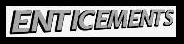

‚úÖ Model Input Shape (Fixed): (1, 100, 32, 3)
Recognized Text: EY


In [44]:
# detect_text() Ïã§Ìñâ
result_img, cropped_imgs = detect_text(img_pil)

# Í≤∞Í≥º Ï∂úÎ†•
display(result_img)

# Îã®Ïñ¥ Ïù∏Ïãù ÏàòÌñâ Ï†ÑÏóê Ïù¥ÎØ∏ÏßÄ ÌôïÏù∏
for i, cropped_img in enumerate(cropped_imgs):
    print(f"Word {i+1}:")
    display(cropped_img)  # **OCR ÏàòÌñâ Ï†ÑÏóê Ïù¥ÎØ∏ÏßÄ Ï∂úÎ†•**
    
    recognized_text = recognize_img(cropped_img, model_pred, TARGET_CHARACTERS)
    print("Recognized Text:", recognized_text)


In [45]:
for i, cropped_img in enumerate(cropped_imgs):
    img_array = np.array(cropped_img.resize((100, 32))).astype(np.float32) / 255.0

    if len(img_array.shape) == 2:
        img_array = np.expand_dims(img_array, axis=-1)  # (H, W, 1)
        img_array = np.repeat(img_array, 3, axis=-1)  # (H, W, 3)

    # üîπ Ï±ÑÎÑê Ï∞®Ïõê ÌôïÏù∏ Î∞è Î≥ÄÌôò
    img_array = np.expand_dims(img_array, axis=0)  # Î∞∞Ïπò Ï∞®Ïõê Ï∂îÍ∞Ä (1, H, W, C)

    #  **H, W ÏúÑÏπò Î≥ÄÌôò (32, 100, 3) ‚Üí (100, 32, 3)**
    img_array = np.transpose(img_array, (0, 2, 1, 3))  # (1, 32, 100, 3) ‚Üí (1, 100, 32, 3)

    # ÏàòÏ†ï ÌõÑ ÏûÖÎ†• ÌÅ¨Í∏∞ ÌôïÏù∏
    print(f"‚úÖ Model Input Shape (Fixed): {img_array.shape}")

    # üîπ OCR Î™®Îç∏ ÏòàÏ∏°
    y_pred = model_pred.predict(img_array)

    # üîπ ÏõêÎ≥∏ OCR Ï∂úÎ†• ÌôïÏù∏
    print(f"Word {i+1}: Raw OCR Output (argmax) ‚Üí", np.argmax(y_pred, axis=-1))

    recognized_text = recognize_img(cropped_img, model_pred, TARGET_CHARACTERS)
    print("Recognized Text:", recognized_text)


‚úÖ Model Input Shape (Fixed): (1, 100, 32, 3)
Word 1: Raw OCR Output (argmax) ‚Üí [[37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37  5 25]]
‚úÖ Model Input Shape (Fixed): (1, 100, 32, 3)
Recognized Text: EY


# ÏóêÎü¨

Model Input ShapeÍ∞Ä Í∞ÄÎ°ú ÏÑ∏Î°úÍ∞Ä Î∞îÎÄåÏñ¥ ÎÇòÌÉÄÎÇòÎäî Î¨∏Ï†ú -> transposeÎ°ú Ìï¥Í≤∞

 Model Input Shape (Fixed): (1, 100, 32, 3)
Word 1: Raw OCR Output (argmax) ‚Üí [[37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37  5 25]]
‚úÖ Model Input Shape (Fixed): (1, 100, 32, 3)
Recognized Text: EY

Ïñ¥Îñ§ Í∞íÏù¥Îì† Recognized TextÍ∞Ä EYÎ°ú ÎÇòÌÉÄÎÇ®...

-> Î™®Îç∏Ïù¥ ÏûòÎ™ª ÌïôÏäµÎêòÏóàÎÇò?

Î∞îÏö¥Îî© Î∞ïÏä§ ÎäòÎ¶¨Í∏∞

# ÌÖçÏä§Ìä∏ ÏòÅÏó≠ Ï¢åÌëú Ï∂îÏ∂ú 5 -> 10ÏúºÎ°ú ÎäòÎ¶¨Í∏∞
        
        x_min = int(text_result[:, 0].min() - 10)
        x_max = int(text_result[:, 0].max() + 10)
        y_min = int(text_result[:, 1].min() - 10)
        y_max = int(text_result[:, 1].max() + 10)
        word_box = (x_min, y_min, x_max, y_max)
        
# resizeÏóêÏÑú Î≠îÍ∞Ä Î¨∏Ï†úÍ∞Ä ÏûàÎÇò?


# Ìï¥ÏïºÌïòÎäî Í≤É

Ìï®ÏàòÎ°ú ÌïòÎÇòÎ°ú Î¨∂Ïñ¥ÏÑú ÏûÖÎ†•Ìïú Í≤É ÎÑ£ÏúºÎ©¥ ÌïòÎÇòÎ°ú ÎÇòÏò§Í≤å ÌïòÍ∏∞

metric(accurancy, WER, CER) Î°ú ÌèâÍ∞ÄÌïòÍ∏∞, Ï†ïÏÑ±ÏãùÏúºÎ°ú ÌèâÍ∞ÄÌïòÍ∏∞

# ÌöåÍ≥†Î°ù

Ïùå Ï§ëÍ∞ÑÏóê ÎÑàÎ¨¥ Íº¨Ïó¨Î≤ÑÎ†§ÏÑú Ï†úÎåÄÎ°ú Î™ªÌïú Í≤É Í∞ôÏäµÎãàÎã§... Ï£ºÎßêÏóê Ï¢Ä Îçî Ìï¥ÏïºÍ≤†ÏäµÎãàÎã§. Ìùë
